In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sympy import *


In [122]:
class Simulation:

    def __init__(self,initial_wealth = 2,fee = 2,samplesize = 100000,distribution_log_cutoff = 40,rounds = 130):
        self.initial_wealth = initial_wealth
        self.fee = fee
        self.samplesize = samplesize
        self.distribution_log_cutoff = distribution_log_cutoff
        self.rounds = rounds
        self.rng = np.random.default_rng()
        self.a_capital = [self.initial_wealth]*self.samplesize
        self.markov_transition_vals = [2**j - self.fee for j in range(self.distribution_log_cutoff)]
        self.markov_transition_probs = [2**(-j - 1) for j in range(self.distribution_log_cutoff - 1)] + [2/(2**(self.distribution_log_cutoff))]
        self.calculate_next_wealth = np.frompyfunc(lambda x,y: x + y if x >= self.fee else x, 2, 1)

    def __iter__(self):
        self.count = 0
        return self

    def __next__(self):
        if self.count > self.rounds:
            raise StopIteration
        self.count += 1
        s = self.rng.choice(self.markov_transition_vals, size=self.samplesize, p=self.markov_transition_probs)
        self.a_capital = self.calculate_next_wealth(self.a_capital,s)
        return self

    def stats(self):
        return stats.describe(list(self.a_capital))


In [149]:
sim = Simulation(fee = 2, initial_wealth=5, samplesize=100, rounds = 1000)
for i in sim:
    print(i.a_capital[:100])

[35 4 7 4 7 4 7 4 5 4 5 4 4 4 4 4 4 4 19 11 5 5 19 5 35 4 5 5 4 19 4 5 5 4
 4 4 4 5 4 4 19 5 5 19 4 4 5 4 5 7 4 4 5 7 19 35 5 4 4 7 5 5 5 4 7 4 19 5
 5 5 4 5 7 4 11 7 5 4 5 7 4 4 7 7 4 7 4 19 4 4 5 4 4 4 7 4 4 4 67 4]
[49 3 6 3 6 3 6 6 7 4 11 4 3 4 4 4 3 3 18 11 4 5 18 7 35 4 7 7 3 18 3 7 7
 3 3 6 3 4 4 4 19 4 4 19 4 10 7 3 4 6 6 6 4 7 21 34 11 10 3 7 5 4 4 3 7 3
 18 4 7 5 4 7 6 10 10 6 4 10 4 6 4 4 6 9 3 37 3 18 4 3 4 18 3 3 7 6 4 4 66
 66]
[48 9 6 9 6 2 8 12 6 18 11 3 17 6 3 4 9 9 18 11 3 4 18 6 37 3 6 6 17 20 3
 6 6 2 2 6 2 4 18 3 21 4 3 19 4 12 6 2 4 12 8 5 3 7 23 33 10 9 3 7 4 6 4 2
 7 9 18 6 9 4 10 6 5 9 16 6 18 10 3 6 3 3 8 11 17 37 2 17 3 5 3 20 17 2 6
 20 6 34 66 65]
[47 9 5 15 6 1 7 26 6 24 10 5 16 6 2 6 9 8 17 17 2 6 17 5 39 3 5 6 23 19 2
 5 5 1 1 8 1 10 18 3 20 4 2 18 3 26 5 1 3 11 7 4 3 9 22 33 10 9 3 13 3 12
 3 1 6 8 18 6 8 4 10 5 5 8 15 5 17 9 3 6 2 2 10 10 16 43 2 23 2 5 2 19 23
 2 5 19 12 34 66 65]
[46 8 19 14 36 1 7 26 5 23 9 5 18 20 2 12 8 7 16 23 1 5 17 11 38 2 5 8 

In [130]:
class StoppTime:

    def __init__(self, *args, **kwargs):
        self.sim = Simulation(*args, **kwargs)
        self.stopped_time = pd.DataFrame({'stopped_time':[-1]*self.sim.samplesize})

    def __iter__(self):
        self.count = 0
        self.sim = iter(self.sim)
        return self

    def __next__(self):
        if self.count > self.sim.rounds:
            raise StopIteration
        self.count += 1
        s = pd.DataFrame({'cap': next(self.sim).a_capital})
        fee = self.sim.fee
        self.stopped_time.iloc[[self.stopped_time['stopped_time'] == -1,s['cap'] < fee], 'stopped_time'] = self.count
        return self.stopped_time



In [164]:
st = StoppTime(samplesize = 100)
s = pd.DataFrame({'cap': next(iter(st.sim)).a_capital})
pd.concat([s[s > 2],st.stopped_time[st.stopped_time == -1]], axis = 1)


,cap,stopped_time
0,NaN,-1
1,NaN,-1
2,NaN,-1
3,NaN,-1
4,NaN,-1
...,...,...
95,NaN,-1
96,4,-1
97,NaN,-1
98,NaN,-1


In [17]:
class Heron:
    def __init__(self,square):
        self.square = square
    def __iter__(self):
        self.count = 0
        return self
    def __next__(self):
        self.appr = 1/2(self.appr + 1/self.appr)
        return self.appr

1.0

In [3]:
fee = 2
capital = 2

In [121]:
class my_mx(Function):
    @classmethod
    def eval(cls, z):
        if z == 1:
            return 1
        if(3/2* pi > arg(z) > pi):
            return my_mx(-1*z)-z
        if(arg(z) > pi*3/2):
            return conjugate(my_mx(conjugate(z)))
        return 1/2*(z + my_mx(z**2))


In [136]:
n = symbols('n')
[my_mx(exp(I*2*pi*n/32)) for n in range(32)]
plot({1,
 0.0625*I + 0.125*exp(I*pi/4) + 0.25*exp(I*pi/8) + 0.5*exp(I*pi/16),
 0.125*I + 0.25*exp(I*pi/4) + 0.5*exp(I*pi/8),
 -0.0625*I + 0.125*exp(3*I*pi/4) + 0.25*exp(3*I*pi/8) + 0.5*exp(3*I*pi/16),
 0.25*I + 0.5*exp(I*pi/4),
 0.125*exp(-3*I*pi/4) + 0.0625*I + 0.25*exp(5*I*pi/8) + 0.5*exp(5*I*pi/16),
 -0.125*I + 0.25*exp(3*I*pi/4) + 0.5*exp(3*I*pi/8),
 0.125*exp(-I*pi/4) - 0.0625*I + 0.25*exp(7*I*pi/8) + 0.5*exp(7*I*pi/16),
 0.5*I,
 0.25*exp(-7*I*pi/8) + 0.0625*I + 0.125*exp(I*pi/4) + 0.5*exp(9*I*pi/16),
 0.25*exp(-3*I*pi/4) + 0.125*I + 0.5*exp(5*I*pi/8),
 0.25*exp(-5*I*pi/8) - 0.0625*I + 0.125*exp(3*I*pi/4) + 0.5*exp(11*I*pi/16),
 -0.25*I + 0.5*exp(3*I*pi/4),
 0.25*exp(-3*I*pi/8) + 0.125*exp(-3*I*pi/4) + 0.0625*I + 0.5*exp(13*I*pi/16),
 0.25*exp(-I*pi/4) - 0.125*I + 0.5*exp(7*I*pi/8),
 0.25*exp(-I*pi/8) + 0.125*exp(-I*pi/4) - 0.0625*I + 0.5*exp(15*I*pi/16),
 0,
 0.5*exp(-15*I*pi/16) + 0.0625*I + 0.125*exp(I*pi/4) + 0.25*exp(I*pi/8),
 0.5*exp(-7*I*pi/8) + 0.125*I + 0.25*exp(I*pi/4),
 0.5*exp(-13*I*pi/16) - 0.0625*I + 0.125*exp(3*I*pi/4) + 0.25*exp(3*I*pi/8),
 0.5*exp(-3*I*pi/4) + 0.25*I,
 0.5*exp(-11*I*pi/16) + 0.125*exp(-3*I*pi/4) + 0.0625*I + 0.25*exp(5*I*pi/8),
 0.5*exp(-5*I*pi/8) - 0.125*I + 0.25*exp(3*I*pi/4),
 0.5*exp(-9*I*pi/16) + 0.125*exp(-I*pi/4) - 0.0625*I + 0.25*exp(7*I*pi/8),
 -0.5*I,
 0.5*exp(-7*I*pi/16) + 0.25*exp(-7*I*pi/8) + 0.0625*I + 0.125*exp(I*pi/4),
 0.5*exp(-3*I*pi/8) + 0.25*exp(-3*I*pi/4) + 0.125*I,
 0.5*exp(-5*I*pi/16) + 0.25*exp(-5*I*pi/8) - 0.0625*I + 0.125*exp(3*I*pi/4),
 0.5*exp(-I*pi/4) - 0.25*I,
 0.5*exp(-3*I*pi/16) + 0.25*exp(-3*I*pi/8) + 0.125*exp(-3*I*pi/4) + 0.0625*I,
 0.5*exp(-I*pi/8) + 0.25*exp(-I*pi/4) - 0.125*I,
 0.5*exp(-I*pi/16) + 0.25*exp(-I*pi/8) + 0.125*exp(-I*pi/4) - 0.0625*I})

TypeError: must be real number, not tuple

In [114]:
toe

-0.5*I

In [62]:
m_red


Sum(2**(-j - 1)*z**(2**j), (j, 0, n))/z**2

In [76]:
theta = symbols('theta')
s_m_red = m_red.subs(n,10).subs(z,exp(I*theta*2*pi)).doit()
s_m_red
r_red = re(s_m_red)
i_red = im(s_m_red)

In [78]:
r_red

(exp(-2*pi*im(theta))*sin(2*pi*re(theta))/2 + exp(-4*pi*im(theta))*sin(4*pi*re(theta))/4 + exp(-8*pi*im(theta))*sin(8*pi*re(theta))/8 + exp(-16*pi*im(theta))*sin(16*pi*re(theta))/16 + exp(-32*pi*im(theta))*sin(32*pi*re(theta))/32 + exp(-64*pi*im(theta))*sin(64*pi*re(theta))/64 + exp(-128*pi*im(theta))*sin(128*pi*re(theta))/128 + exp(-256*pi*im(theta))*sin(256*pi*re(theta))/256 + exp(-512*pi*im(theta))*sin(512*pi*re(theta))/512 + exp(-1024*pi*im(theta))*sin(1024*pi*re(theta))/1024 + exp(-2048*pi*im(theta))*sin(2048*pi*re(theta))/2048)*exp(4*pi*im(theta))*sin(4*pi*re(theta)) + (exp(-2*pi*im(theta))*cos(2*pi*re(theta))/2 + exp(-4*pi*im(theta))*cos(4*pi*re(theta))/4 + exp(-8*pi*im(theta))*cos(8*pi*re(theta))/8 + exp(-16*pi*im(theta))*cos(16*pi*re(theta))/16 + exp(-32*pi*im(theta))*cos(32*pi*re(theta))/32 + exp(-64*pi*im(theta))*cos(64*pi*re(theta))/64 + exp(-128*pi*im(theta))*cos(128*pi*re(theta))/128 + exp(-256*pi*im(theta))*cos(256*pi*re(theta))/256 + exp(-512*pi*im(theta))*cos(512*pi*re

In [77]:
plot_parametric((r_red,i_red), (theta,0,1))

ValueError: The TextBackend supports only expressions over a 1D range

In [173]:
def pp(expr,var = z):
    return sum(term for term in expr.as_ordered_terms() if term.as_powers_dict().get(var,0) < 0)

def remove_pp(expr,var = z):
    return expr - pp(expr,var)

m_10 = m.subs(n,10).doit()

def next_iteration(expr):
    expr *= m_10 * z **(-2*fee)
    expr = remove_pp(expand(expr))
    expr *= z**fee
    return (expr + O(z**(2**5))).removeO()

In [175]:
expr = z**capital
for _ in range(7):
    expr = next_iteration(expr)
print(N(expr.removeO().subs(z,1)))

0.284483185551541


In [157]:
N(7906837389326948891304012194741547940711891703978121239465/102844034832575377634685573909834406561420991602098741459288064)

7.68818279271020e-5

In [150]:
N(823063132549697323662684939333633/1298074214633706907132624082305024)

0.634064773239449

In [62]:
m = m.subs(n,100)
m = m.doit()



In [84]:
series(limit(m2.subs(n,4).subs(k,10).doit(),s,1,"+"),z,0,8)
#limit(m2.subs(n,100).subs(m,100).doit(),s,1,"-")



KeyboardInterrupt



In [63]:
res1 = series(z**fee/(z**fee - s*m), z, 0, 10)
res2 = series(z**(fee + capital)/(z**fee - s*m), z, 0, 10)

In [64]:
res1

-2*z/s - 2*z**2*(-1/2 + 2/s)/s - 2*z**3*(1/2 - 2/s)**2/s - 2*z**4*(-(1/2 - 2/s)**3 - 1/4)/s - 2*z**5*((1/2 - 2/s)**4 + 1/4 - 1/s)/s - 2*z**6*(-(1/4 - 1/s)*(1/2 - 2/s) - (1/2 - 2/s)**5 - (1/2 - 2/s)**2/4)/s - 2*z**7*((1/2 - 2/s)**6 + (1/2 - 2/s)**3/4 + (1/2 - 2/s)*((1/4 - 1/s)*(1/2 - 2/s) + (1/2 - 2/s)**2/4) + 1/16)/s - 2*z**8*(-(1/2 - 2/s)**7 - (1/2 - 2/s)**4/4 - (1/2 - 2/s)*((1/2 - 2/s)**3/4 + (1/2 - 2/s)*((1/4 - 1/s)*(1/2 - 2/s) + (1/2 - 2/s)**2/4)) - 7/32 + 3/(8*s))/s - 2*z**9*((3/32 - 3/(8*s))*(1/2 - 2/s) + (1/4 - 1/s)*(1/2 - 2/s)/4 + (1/2 - 2/s)**8 + (1/2 - 2/s)**5/4 + (1/2 - 2/s)**2/16 + (1/2 - 2/s)*((1/2 - 2/s)**4/4 + (1/2 - 2/s)*((1/2 - 2/s)**3/4 + (1/2 - 2/s)*((1/4 - 1/s)*(1/2 - 2/s) + (1/2 - 2/s)**2/4))) + 1/8 - 1/(2*s))/s + O(z**10)

In [65]:
res2

-2*z**3/s - 2*z**4*(-1/2 + 2/s)/s - 2*z**5*(1/2 - 2/s)**2/s - 2*z**6*(-(1/2 - 2/s)**3 - 1/4)/s - 2*z**7*((1/2 - 2/s)**4 + 1/4 - 1/s)/s - 2*z**8*(-(1/4 - 1/s)*(1/2 - 2/s) - (1/2 - 2/s)**5 - (1/2 - 2/s)**2/4)/s - 2*z**9*((1/2 - 2/s)**6 + (1/2 - 2/s)**3/4 + (1/2 - 2/s)*((1/4 - 1/s)*(1/2 - 2/s) + (1/2 - 2/s)**2/4) + 1/16)/s + O(z**10)

In [67]:
m2

Sum(z**2*(s*(z**1267650600228229401496703205376/2535301200456458802993406410752 + z**633825300114114700748351602688/1267650600228229401496703205376 + z**316912650057057350374175801344/633825300114114700748351602688 + z**158456325028528675187087900672/316912650057057350374175801344 + z**79228162514264337593543950336/158456325028528675187087900672 + z**39614081257132168796771975168/79228162514264337593543950336 + z**19807040628566084398385987584/39614081257132168796771975168 + z**9903520314283042199192993792/19807040628566084398385987584 + z**4951760157141521099596496896/9903520314283042199192993792 + z**2475880078570760549798248448/4951760157141521099596496896 + z**1237940039285380274899124224/2475880078570760549798248448 + z**618970019642690137449562112/1237940039285380274899124224 + z**309485009821345068724781056/618970019642690137449562112 + z**154742504910672534362390528/309485009821345068724781056 + z**77371252455336267181195264/154742504910672534362390528 + z**38685626227668133590

In [55]:
res1.subs(s,1)

-2*z - 3*z**2 - 9*z**3/2 - 25*z**4/4 - 69*z**5/8 - 189*z**6/16 - 517*z**7/32 - 1397*z**8/64 - 3765*z**9/128 + O(z**10)

In [56]:
res2.subs(s,1)

-2*z**3 - 3*z**4 - 9*z**5/2 - 25*z**6/4 - 69*z**7/8 - 189*z**8/16 - 517*z**9/32 + O(z**10)

In [57]:
u_tilde = series(res2/res1,z,0,8)

In [58]:
limit(u_tilde,s,1,"-")

z**2

In [137]:
x = symbols('x')
y = symbols('y')

In [142]:
F = fps(x * sqrt(1 - y**4) + y * sqrt(1 - x**4) / (1 + x**2 * y**2),x,y)

In [143]:
f = series(F,x,y)

In [144]:
f + O(x**3) + O(y**3)

FormalPowerSeries(x*sqrt(1 - y**4) + y*sqrt(1 - x**4)/(x**2*y**2 + 1), x, y, 1, (SeqFormula(Coeff(sqrt(1 - y**4)*(x + y), x, _k), (_k, 1, oo)), SeqFormula((x - y)**_k, (_k, 0, oo)), y*sqrt(1 - x**4)/(x**2*y**2 + 1))) + O(y**3) + O(x**3)

In [245]:
theta = symbols('theta')
phi = Function('phi')
psi = Function('psi')
T = integrate(phi(theta)*psi(theta)*(1 - exp(I*theta)),(theta,0,2*pi))

In [246]:
T

-Integral(-phi(theta)*psi(theta), (theta, 0, 2*pi)) - Integral(phi(theta)*psi(theta)*exp(I*theta), (theta, 0, 2*pi))

In [275]:
import numpy as np

def monte_carlo_integration(N,a,b,f):
    s = np.random.uniform(a,b,N)
    fs = np.vectorize(lambda t: f(t))(s)
    return sum(fs)/N*(b-a)

def my_fun(x):
    return np.exp((-2)*1j*x)*np.exp(1j*(1/2*x+1/4*x**2+1/8*x**4+1/16*x**8+1/32*x**16))

def monte_carlo_integration_multi(N,bounds):
    s1 = np.random.uniform(bounds[0],bounds[1],N)
    s2 = np.random.uniform(bounds[2],bounds[3],N)
    s = list(zip(s1,s2))
    fs = np.array(list(map(lambda x: my_fun(x[0])*my_fun(x[1])*(1-np.exp(1j*(x[1]-x[0])))*exp(1j*x[0]), s)))
    return sum(fs)/N*(bounds[1]-bounds[0])*(bounds[3]-bounds[2])





In [269]:
N = 10
bounds = [0,1,2,3]
s1 = np.random.uniform(bounds[0],bounds[1],N)
s2 = np.random.uniform(bounds[2],bounds[3],N)
s = list(zip(s1,s2))
list(map(lambda x: x,s))

[(np.float64(0.4088945973875605), np.float64(2.5458562312243886)),
 (np.float64(0.2603686680189503), np.float64(2.29736263766965)),
 (np.float64(0.8492056818836133), np.float64(2.097663079958319)),
 (np.float64(0.8476981730885488), np.float64(2.919900379533926)),
 (np.float64(0.5554153209364331), np.float64(2.440351270432799)),
 (np.float64(0.4553769886566692), np.float64(2.8982638261339155)),
 (np.float64(0.4285936243138505), np.float64(2.590087226067459)),
 (np.float64(0.5208512988017666), np.float64(2.2263636345341826)),
 (np.float64(0.36677669154169423), np.float64(2.7507933345262865)),
 (np.float64(0.6783948038702067), np.float64(2.58131463864546))]

In [272]:
a = (1,2)

a[1]

2

In [283]:
monte_carlo_integration_multi(1000,[0,2*pi,0,2*pi]).evalf()

-1.42467612607358 - 1.15070171551078*I

In [363]:
from scipy.integrate import dblquad
import scipy.integrate as integrate

phi = lambda x: np.exp(1j*x*(-2)) * (1/2*(np.exp(1j*x) + 1/2*(np.exp(1j*x*2) + 1/2*(np.exp(1j*x*4) + 1/2*(np.exp(1j*x*8) + 1/2*(np.exp(1j*x*16)+1/2*(np.exp(1j*x*32) + 1))))))) #fee + gain
psi = lambda x: np.exp(1j*x*2) #initial
T_1 = lambda y: integrate.quad(lambda x: phi(x)*psi(x),0,2*pi,weight='cauchy',wvar=1)
def integrand(x,y):
    return phi(x)*phi(y)*psi(x)*(1/(1 - np.exp(1j*(y-x))))*(1/(1 - np.exp(1j*(0 - y))))


In [894]:
rng = np.random.default_rng()
epsilon = 0
R = 1
phi = lambda x: R**(-2)*np.exp(1j*x*(-2)) * (1/2*R*(np.exp(1j*x) + 1/2*R**2*(np.exp(1j*x*2) + 1/2*R**4*(np.exp(1j*x*4) + 1/2*R**8*(np.exp(1j*x*8) + 1/2*R**16*(np.exp(1j*x*16)+1/2*R**32*(np.exp(1j*x*32) + 1)))))))
psi = lambda x: np.exp(1j*x*2)*R**2
N = 1000 #samples
M = 2 #number of factors
samples = np.stack([rng.uniform(epsilon,2*np.pi-epsilon,N) for _ in range(M)],axis=0)
samples_phi = np.vectorize(phi)(samples)
samples_psi = np.vectorize(psi)(samples[-1])
def c_weight(a,b):
    return R*np.exp(1j*a)/(R*np.exp(1j*a) - np.exp(1j*b))
c_weight_ufunc = np.frompyfunc(c_weight,2,1)
samples_weights = np.stack([c_weight_ufunc(samples[0,:], 1)] + [c_weight_ufunc(samples[j+1,:],samples[j,:]) for j in range(M - 1)],axis=0)
vals = np.stack([samples_phi.prod(axis=0),samples_weights.prod(axis=0),samples_psi],axis=0)
vals.prod(axis=0).sum()/N/(2*np.pi)**M

np.complex128(-0.02666706203484923-0.027101000466384258j)

In [662]:
vals.prod(axis=0).sum(axis=0)

np.complex128(832.6293772750645+5913.253993614042j)

In [369]:
T_2[0]/((2*np.pi)**2)

0.0580649077871603

In [370]:
(T_1(0)/(2*pi)).evalf()

0.499999999999983

In [376]:
from scipy.integrate import nquad
epsilon = 0.00001
def integrand(u,v,w,x,y,z):
    return phi(u)*phi(v)*phi(w)*phi(x)*phi(y)*phi(z)*psi(u) * \
        np.exp(1j*u)/(np.exp(1j*u)-(1-epsilon)*np.exp(1j*v)) * \
        np.exp(1j*v)/(np.exp(1j*v)-(1-epsilon)*np.exp(1j*w)) * \
        np.exp(1j*w)/(np.exp(1j*w)-(1-epsilon)*np.exp(1j*x)) * \
        np.exp(1j*x)/(np.exp(1j*x)-(1-epsilon)*np.exp(1j*y)) * \
        np.exp(1j*y)/(np.exp(1j*y)-(1-epsilon)*np.exp(1j*z)) * \
    1/(1-(1-epsilon)*np.exp(1j*z))

In [377]:
I = nquad(integrand, [(0,2*np.pi)]*6)

/Users/retrogaming/PrivateRepos/Coding/ProjectEulerStochastik/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/retrogaming/PrivateRepos/Coding/ProjectEulerStochastik/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


KeyboardInterrupt: 

In [165]:
import numpy as np
from scipy.linalg import *

d = 10
r = np.zeros(2**d)
r[0] = 1/4
r[1] = 1/2

c = np.zeros(2**d)
for j in range(1,d + 1):
    c[2**j - 2] = 2**(-1*(j + 1))

A = toeplitz(c,r)



In [206]:
from scipy.linalg import *
u,r = polar(A, side='right')

In [184]:
np.round(l,2)

array([[ 0.54,  0.81, -0.17, ..., -0.  ,  0.  , -0.  ],
       [-0.23,  0.35,  0.89, ..., -0.  ,  0.  ,  0.  ],
       [ 0.34, -0.15,  0.31, ...,  0.  , -0.  , -0.  ],
       ...,
       [-0.02,  0.01, -0.  , ...,  0.31,  0.89, -0.17],
       [ 0.03, -0.02,  0.01, ..., -0.15,  0.35,  0.81],
       [-0.06,  0.03, -0.02, ...,  0.34, -0.23,  0.54]])

In [207]:
r@u@r

array([[ 2.50000000e-01,  5.00000000e-01, -8.50036300e-16, ...,
        -2.43613956e-16,  1.17604846e-16,  5.61932664e-17],
       [-1.48305347e-16,  2.50000000e-01,  5.00000000e-01, ...,
        -1.56775292e-17, -2.18788274e-18,  1.63083963e-16],
       [ 1.25000000e-01,  1.08079308e-15,  2.50000000e-01, ...,
         5.06748259e-18, -1.12962446e-16, -2.04096773e-16],
       ...,
       [ 1.55311775e-17,  8.67228226e-17, -7.97178395e-17, ...,
         2.50000000e-01,  5.00000000e-01, -1.29744621e-16],
       [ 4.88281250e-04,  1.22429509e-16,  6.86321448e-17, ...,
        -1.46951871e-17,  2.50000000e-01,  5.00000000e-01],
       [-6.11366492e-17,  4.88281250e-04,  1.00636757e-16, ...,
         1.25000000e-01, -4.83779126e-16,  2.50000000e-01]])

In [392]:
D = {}
for j in range(17):
    D[2**j - 2] = 2**(-1*(j + 1))

In [388]:
def multiply_dicts(dict1, dict2):
    dd = {}
    for a in dict1.keys():
        if a < 0:
            continue
        for b in dict2.keys():
            if a+b not in dd.keys():
                dd[a+b] = 0
            dd[a+b] += dict1[a]*dict2[b]
    return dd



In [393]:
from matplotlib import pyplot as plt
dd = multiply_dicts(D, D)
for _ in range(100):
    dd = multiply_dicts(dd,D)
    print(sum(dd.values()) - dd[-1])



0.3437356950307726
0.3202955725355406
0.30271500387424954
0.29245878809204345
0.2859868302460407
0.280766142480289
0.2763618397600587
0.2728330436644695
0.269988535813479
0.267607654591434
0.2655992907615942
0.26391929679183346
0.2625092185094826
0.26131158613009214
0.26028543555563505
0.2594010816371073
0.2586338155885518
0.25796340368832127
0.2573743206754638
0.2568545412293115
0.2563942757146627
0.2559853913008553
0.25562112917221963
0.2552958174075036
0.2550046229622288
0.25474339596722706
0.25450856762830026
0.254297061963338
0.25410621727086735
0.2539337221023413
0.2537775633675249
0.25363598230134415
0.2535074368665286
0.25339057042440116
0.25328418587001295
0.2531872240516198
0.25309874558898615


KeyboardInterrupt: 

In [444]:
vals = [v for v in dd.keys()]
probs = [p for p in dd.values()]
rng = np.random.default_rng()
probs[0] += 1 - sum(probs)
sample = rng.choice(vals,size=100000,p=probs)
#sample = [s for s in sample if s >= 0]
for _ in range(100):
    sample = next_iteration(sample)
    print(sum([1 for s in sample if s >= 0])/100000)



0.24918
0.24859
0.24782
0.24718
0.24655
0.24592
0.24541
0.24496
0.24474
0.24446
0.24426
0.24406
0.24386
0.24373
0.24365
0.24352
0.24351
0.24348
0.24343
0.24342
0.24339
0.24339
0.24339
0.24338
0.24338
0.24337
0.24337
0.24337
0.24337
0.24337
0.24337
0.24337
0.24337
0.24337
0.24337
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336
0.24336


KeyboardInterrupt: 

In [204]:
T = np.array(A)
for _ in range(10):
    print(T[0].sum())
    T = T@T

0.75


KeyboardInterrupt: 

In [437]:
samplesize = 100000
distribution_log_cutoff = 40
def next_money(x,y):
    if(x<0):
        return -113
    else:
        return x - 2 + y
def my_statistic(xs):
    return np.array([sum([1 for x in xs if x < 0])] + [sum([1 for x in xs if 2**j <= x < 2**(j+1)]) for j in range(0,30)])/samplesize
rng = np.random.default_rng()
vals = [2**y for y in range(distribution_log_cutoff)]
probs = [2**(-j) for j in range(1,distribution_log_cutoff)] + [2/(2**distribution_log_cutoff)]
seed = rng.choice(vals,size=samplesize,p=probs)
next_money_ufunc = np.frompyfunc(lambda x,y: next_money(x,y),2,1)
samples = next_money_ufunc(2,seed)
def next_iteration(xs):
    return next_money_ufunc(xs,rng.choice(vals,size=samplesize,p=probs))


for _ in range(130):
    stats = my_statistic(samples)
    print(stats)
    samples = next_iteration(samples)
    #print(1-stats[0]-stats[1])


[0.0000e+00 5.0135e-01 2.4891e-01 1.2414e-01 6.3230e-02 3.0820e-02
 1.5520e-02 7.5700e-03 4.2500e-03 2.1800e-03 9.7000e-04 4.6000e-04
 2.4000e-04 1.9000e-04 1.1000e-04 3.0000e-05 2.0000e-05 1.0000e-05
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00]
[0.0000e+00 2.5080e-01 1.8687e-01 1.4012e-01 8.1790e-02 4.3890e-02
 2.2720e-02 1.2210e-02 5.9600e-03 3.0600e-03 1.4800e-03 7.1000e-04
 4.6000e-04 2.8000e-04 1.4000e-04 6.0000e-05 0.0000e+00 2.0000e-05
 0.0000e+00 0.0000e+00 1.0000e-05 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00]
[1.2519e-01 9.4160e-02 2.0223e-01 1.5373e-01 1.0518e-01 6.2520e-02
 3.4000e-02 1.7790e-02 8.6700e-03 4.4500e-03 2.3100e-03 1.1300e-03
 6.1000e-04 3.7000e-04 2.4000e-04 6.0000e-05 1.0000e-05 2.0000e-05
 2.0000e-05 0.0000e+00 1.0000e-05 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.

KeyboardInterrupt: 

In [ ]:
import pandas as pd
samplesize = 100000
samples = pd.DataFrame(np.array([2]*samplesize))
clocks = pd.DataFrame(np.array([-1]*samplesize))
for j in range(1,100):
    samples = next_iteration(samples)
    clocks.iloc[samples < 2,clocks == -1] = j


/var/folders/60/ynf6l4250r11c084bvd1j9l40000gp/T/ipykernel_69793/404881082.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.array(stats[1:])))


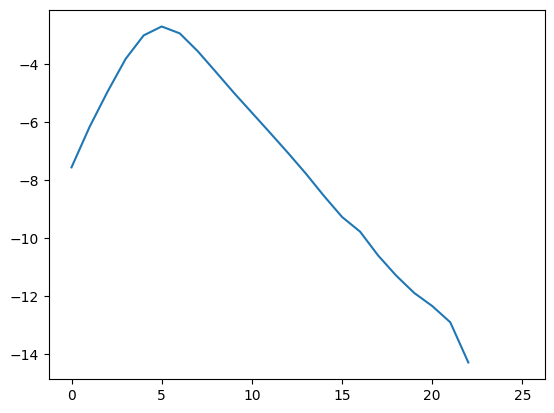

In [347]:
import matplotlib.pyplot as plt
plt.plot(np.log(np.array(stats[1:])))

609.7209718612045


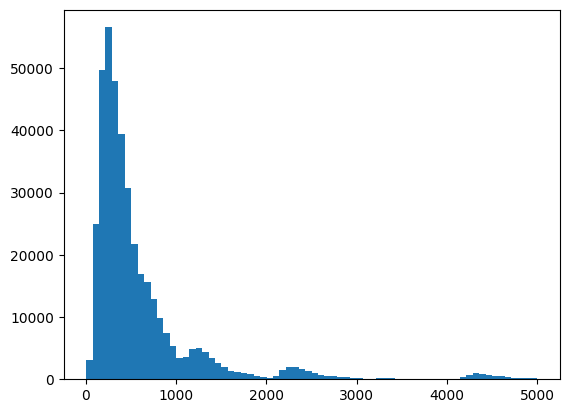

In [338]:
import matplotlib.pyplot as plt
xs = np.array([x for x in samples if 5000>x>1])
plt.hist(xs,bins=70)
print(np.average(xs))

In [205]:
samples

array([8, 1, 64, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 8, 1, 1, 1, 8, 2, 2, 4, 1,
       1, 4, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1,
       8, 4, 1, 2, 4, 1, 2, 1, 1, 2, 2, 4, 1, 1, 2, 1, 1, 1, 1, 2, 16, 16,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 32, 2, 1, 2, 1, 8, 1, 32, 8, 1, 1, 8,
       4, 1, 1, 1, 1, 64, 1, 4, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 2,
       16, 1, 1, 2, 4, 4, 16, 2, 1, 4, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 8, 1,
       32, 2, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 8, 2, 1, 1, 4, 2, 1, 1, 4, 1,
       1, 16, 2, 16, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, 512, 4, 1, 8, 1, 2, 2,
       1, 2, 2, 4, 2, 1, 2, 16, 1, 1, 4, 4, 2, 16, 1, 1, 1, 2, 16, 1, 1,
       1, 2, 1, 1, 4, 2, 1, 2, 2, 2, 1, 1, 1, 1, 8, 1, 16, 1, 8, 1, 2, 1,
       1, 2, 1, 4, 1, 1, 2, 2, 2, 1, 1, 2, 1, 16, 2, 4, 1, 1, 2, 2, 1, 1,
       1, 1, 4, 4, 1, 1, 1, 2, 4, 1, 16, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       8, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 2, 4, 32,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 

In [169]:
sum(probs) + 1/1024

1.0

In [135]:
U, S, V = svd(A - np.identity(2**d))

In [137]:
svdvals(A - np.identity(2**d))

array([1.25594129, 1.25594114, 1.2555316 , ..., 0.01067907, 0.00718511,
       0.00285255])

In [136]:
S[-1]

np.float64(0.0028525521415077326)

In [132]:
v = -1*V[-1]
v_new = v*0.2522/v[0]
v_new[:9]

array([0.2522    , 0.34088005, 0.44589048, 0.51938401, 0.59174581,
       0.66226407, 0.74084072, 0.80246477, 0.86120902])

In [58]:
eas, U = eig(A)

In [73]:
u_tilde = U[0]/norm(U[0])

In [90]:
from scipy.optimize import minimize
u_tilde = U[0]/norm(U[0])
x_0 = np.concat((np.array([eas[0]]), u_tilde), axis=0)
res = minimize(lambda x: norm(A@(x[1:]) - x[0]*(x[1:])**2),x_0)
l, x = res.x[0], res.x[1:]
np.round(abs(x),3)

/Users/retrogaming/PrivateRepos/Coding/ProjectEulerStochastik/.venv/lib/python3.9/site-packages/scipy/_lib/array_api_compat/common/_aliases.py:235: ComplexWarning: Casting complex values to real discards the imaginary part
  return x.astype(dtype=dtype, copy=copy)
/Users/retrogaming/PrivateRepos/Coding/ProjectEulerStochastik/.venv/lib/python3.9/site-packages/scipy/_lib/array_api_compat/common/_aliases.py:235: ComplexWarning: Casting complex values to real discards the imaginary part
  return x.astype(dtype=dtype, copy=copy)


array([1.21859353e-06, 6.08222543e-07, 2.96355330e-07, 4.59063568e-07,
       3.75929839e-07, 2.67506444e-07, 2.42880176e-07, 3.72619866e-07,
       3.21850078e-07, 2.62268108e-07, 2.76192203e-07, 2.67354444e-07,
       2.26499886e-07, 2.18664382e-07, 2.11961686e-07, 2.81045181e-07,
       2.60364905e-07, 2.37087665e-07, 2.45314381e-07, 4.53998994e-06,
       4.53883825e-06, 9.29884538e-06, 9.29897279e-06, 1.37122024e-05,
       1.37119017e-05, 1.71937638e-05, 1.71937021e-05, 4.19184174e-07,
       4.13682040e-07, 3.51362292e-06, 3.51333761e-06, 1.76522201e-06,
       1.76468214e-06, 5.39652974e-05, 5.39652979e-05, 3.19520336e-04,
       3.19520326e-04, 3.82156750e-04, 3.82156751e-04, 2.99035747e-04,
       2.99035740e-04, 2.97118452e-04, 2.97118453e-04, 1.84590158e-07,
       1.52991962e-04, 1.52991964e-04, 1.08440054e-03, 1.08440054e-03,
       1.70232734e-07, 3.87727780e-04, 3.87727779e-04, 1.90918530e-04,
       1.90918523e-04, 4.33275423e-04, 4.33275420e-04, 5.24748169e-03,
      

In [105]:
np.round(np.real(x),6)

array([ 1.e-06, -1.e-06,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,
        0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00,
       -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,  0.e+00, -0.e+00,
        0.e+00, -0.e

In [53]:
b = np.zeros(2**d)
b[1] = 1
x = solve(U,b)
(U@eas**20*x).sum(axis=0)

np.complex128(-0.0008648274764840105+0.0025743478842961166j)

In [19]:
U[0]@U[1]

np.complex128(2.412133738541944+3.4548359251935506e-17j)

In [ ]:


for _ in range(5):
    A = A@A
A.sum(axis=0)

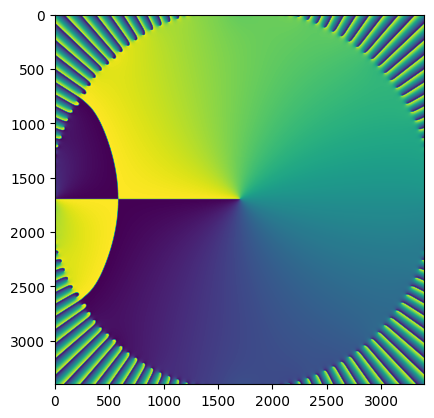

In [221]:
x, y = np.ogrid[-1:1:3400j, -1:1:3400j]
f = lambda z: 1/2*z**(-1) + 1/4 + 1/8*z**2 + 1/16*z**6 + 1/32*z**14 + 1/64*z**30 + 1/128*z**62
plt.imshow(np.angle(f(x-1j*y).T))
plt.show()

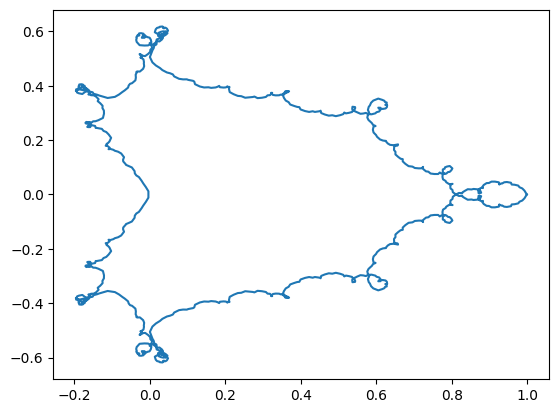

In [250]:
from dcolor import DColor
f = lambda z: 1/2*z**(-1) + 1/4 + 1/8*z**2 + 1/16*z**6 + 1/32*z**14 + 1/64*z**30 + 1/128*z**62 + 1/256*z**126 + 1/512*z**254 + 1/1024*z**510
dc = DColor(xmin=-1.2,xmax=1.2,ymin=-1.2,ymax=1.2)
t = np.linspace(0,2*np.pi,1000)
e = lambda t: f(np.exp(t*1j))

plt.plot(np.real(e(t)),np.imag(e(t)))
plt.show()

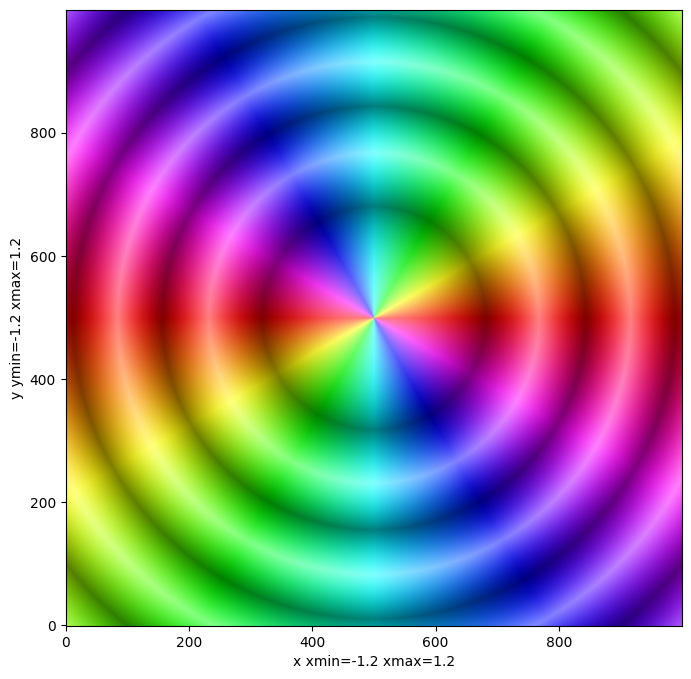

In [251]:
f = lambda z : z**2
dc = DColor(xmin=-1.2,xmax=1.2,ymin=-1.2,ymax=1.2)
dc.plot(f)

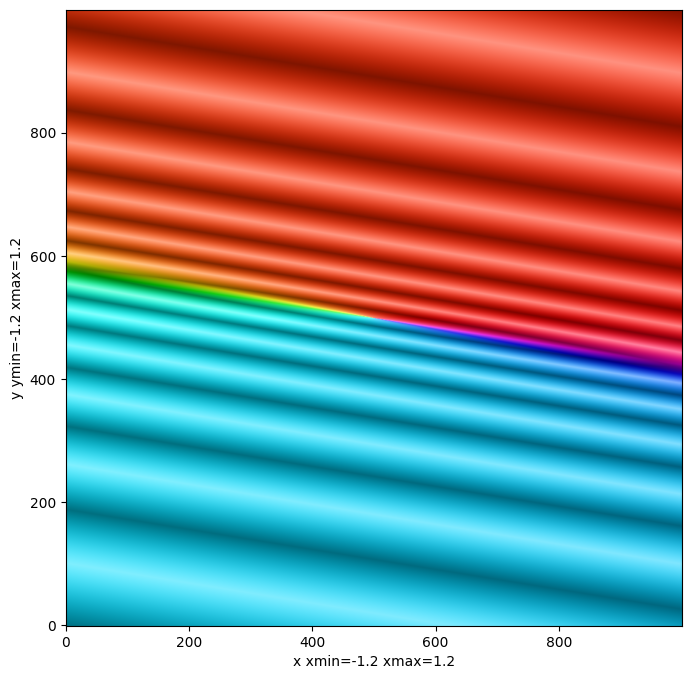

In [254]:
f = lambda z : np.real(z) + np.imag(z) + 1j*np.imag(z)
g = lambda z : f(f(f(f(f(f(z))))))
dc = DColor(xmin=-1.2,xmax=1.2,ymin=-1.2,ymax=1.2)
dc.plot(g)